In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-03-02 16:19:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2024-03-02 16:19:57 (13.0 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd

df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [5]:
len(df)

2787

In [6]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


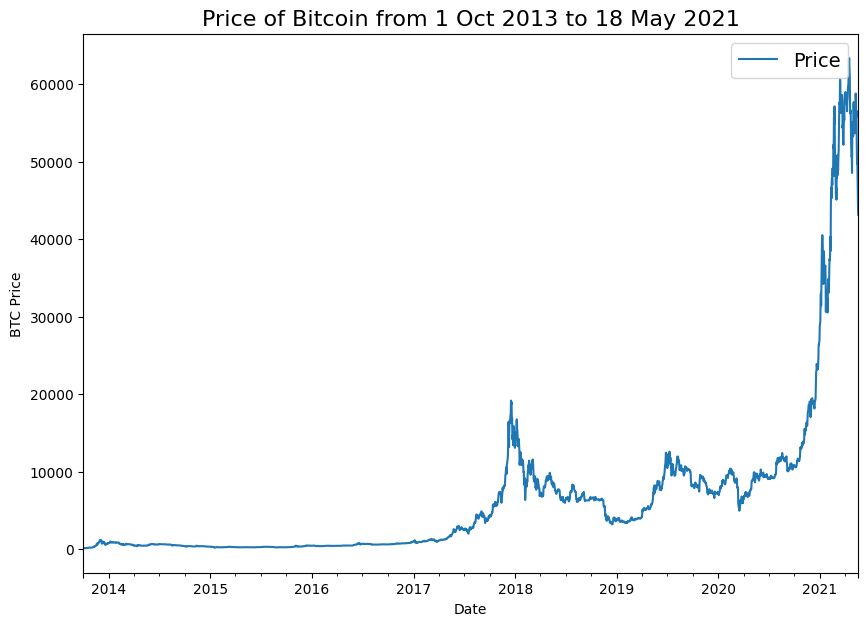

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [8]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

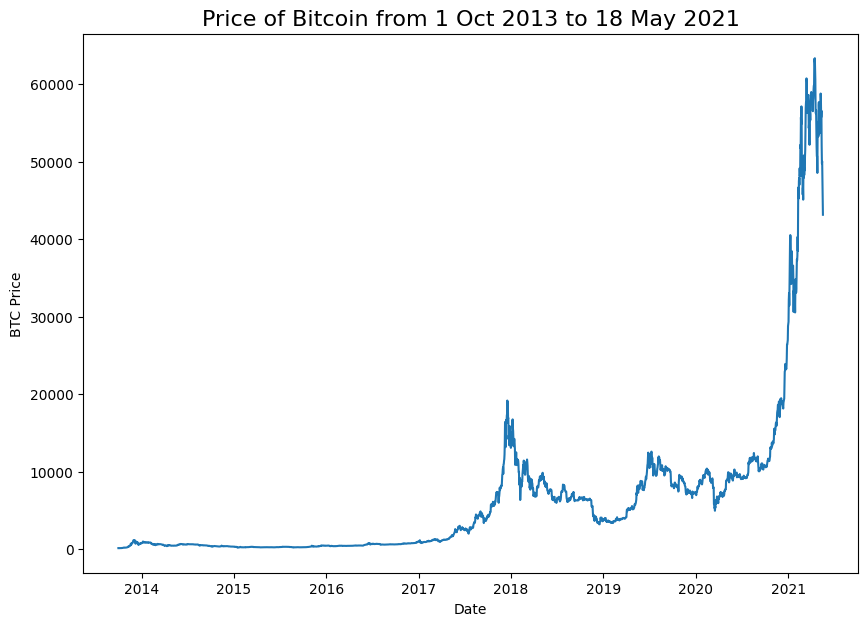

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date");

In [10]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

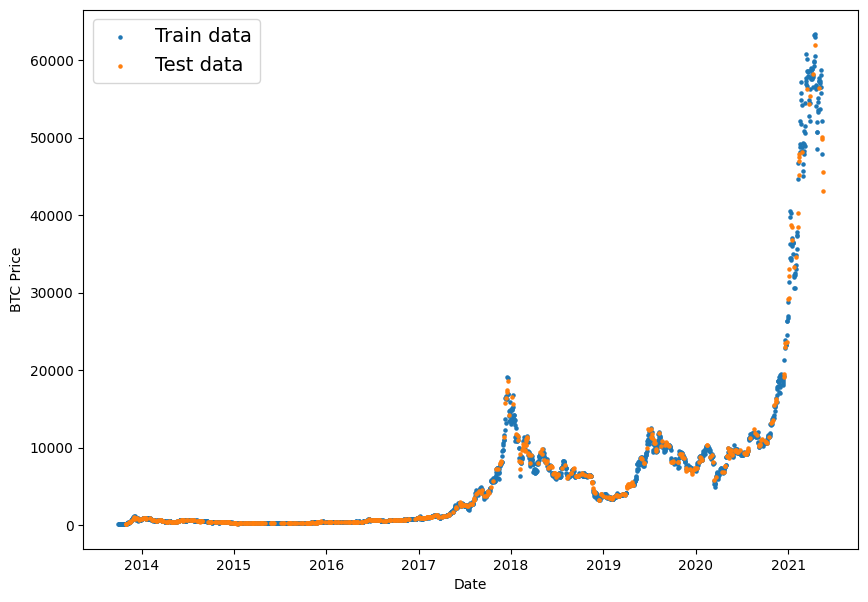

In [12]:
plt.figure(figsize=(10, 7))
plt.scatter(x_train, y_train, s=5, label="Train data")
plt.scatter(x_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [13]:
split_size = int(0.8 * len(prices))

x_train, y_train = timesteps[:split_size], prices[:split_size]

x_test, y_test = timesteps[split_size:], prices[split_size:]
len(x_train), len(x_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

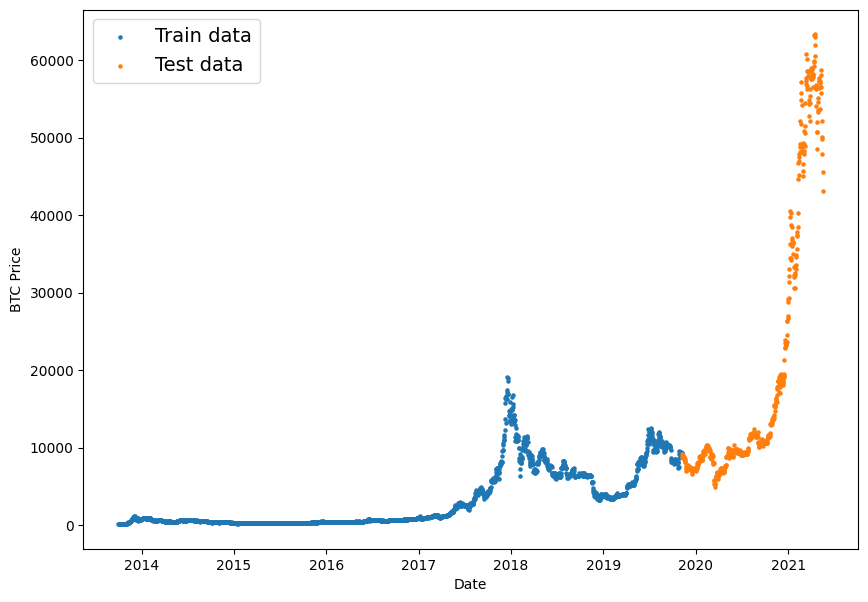

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(x_train, y_train, s=5, label="Train data")
plt.scatter(x_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [15]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

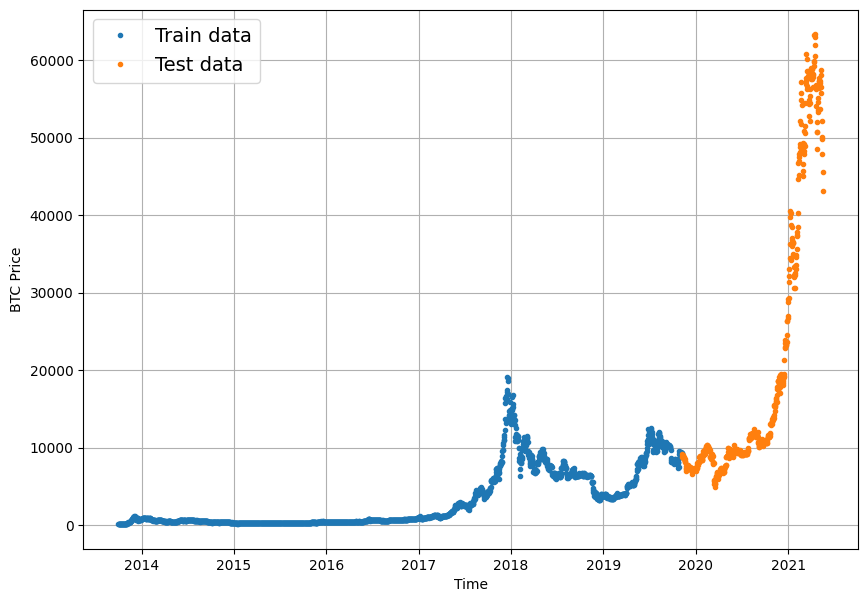

In [16]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_train, values=y_train, label="Train data")
plot_time_series(timesteps=x_test, values=y_test, label="Test data")

In [17]:
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

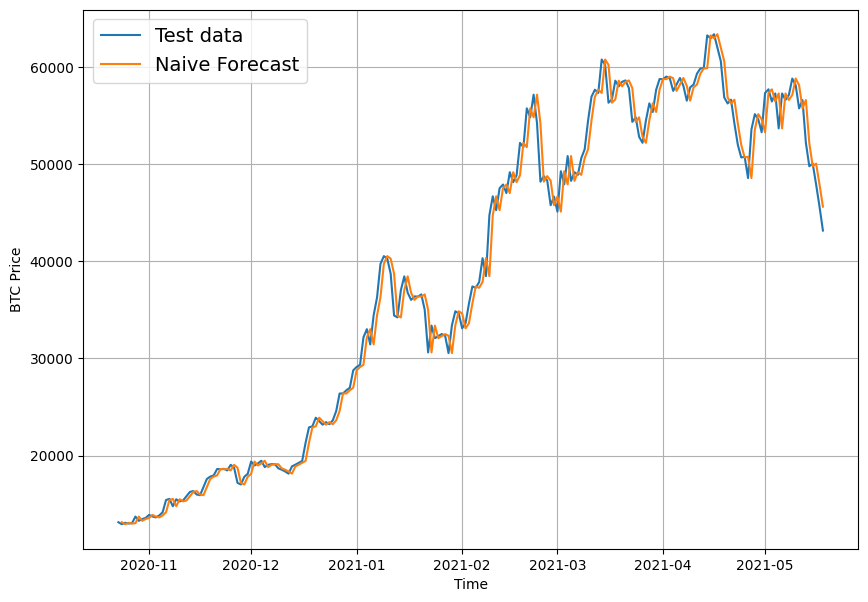

In [18]:
plt.figure(figsize=(10, 7))
#plot_time_series(timesteps=x_train, values=y_train, label="Train data")
plot_time_series(timesteps=x_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

In [19]:
import tensorflow as tf

In [20]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [21]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [22]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [23]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [24]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [25]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

In [26]:
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [27]:
HORIZON = 1
WINDOW_SIZE = 7

In [28]:
def get_labelled_windows(x, horizon=HORIZON):
  return x[:, :-horizon], x[:, -horizon:]

In [29]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


In [30]:
import numpy as np

def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T

  #print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [31]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [32]:
for i in range (3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [33]:
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [34]:
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [35]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [36]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [37]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

In [38]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 6s 102ms/step - loss: 2123.7229 - mae: 2123.7229 - mse: 13301316.0000 - val_loss: 1395.4991 - val_mae: 1395.4991 - val_mse: 4869368.5000
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 366.4748 - mae: 366.4748 - mse: 508633.7188 - val_loss: 1796.4463 - val_mae: 1796.4463 - val_mse: 7503031.0000
Epoch 3/100
18/18 [==============================] - 1s 48ms/step - loss: 231.6208 - mae: 231.6208 - mse: 243561.5312 - val_loss: 1048.2445 - val_mae: 1048.2445 - val_mse: 3295041.5000
Epoch 4/100
18/18 [==============================] - 1s 58ms/step - loss: 180.4755 - mae: 180.4755 - mse: 163552.7812 - val_loss: 950.1672 - val_mae: 950.1672 - val_mse: 2962637.0000
Epoch 5/100
18/18 [==============================] - 0s 13ms/step - loss: 171.0145 - mae: 171.0145 - mse: 157427.8438 - val_loss: 975.6202 - val_mae: 975.6202 - val_mse: 2969884.0000
Epoch 6/100
18/18 [==============================] - 1s 56ms/step - loss: 1

In [39]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [40]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 755.7825 - mae: 755.7825 - mse: 1617966.0000


[755.782470703125, 755.782470703125, 1617966.0]

In [41]:
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 571.0305 - mae: 571.0305 - mse: 1172195.1250


[571.0304565429688, 571.0304565429688, 1172195.125]

In [42]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [43]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8836.668, 8786.194, 9060.62 , 8760.787, 8722.312, 8760.891,
        8663.705, 8536.329, 8448.835, 8541.07 ], dtype=float32)>)

In [44]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 571.03046,
 'mse': 1172195.1,
 'rmse': 1082.6796,
 'mape': 2.5577369,
 'mase': 1.0031424}

In [45]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

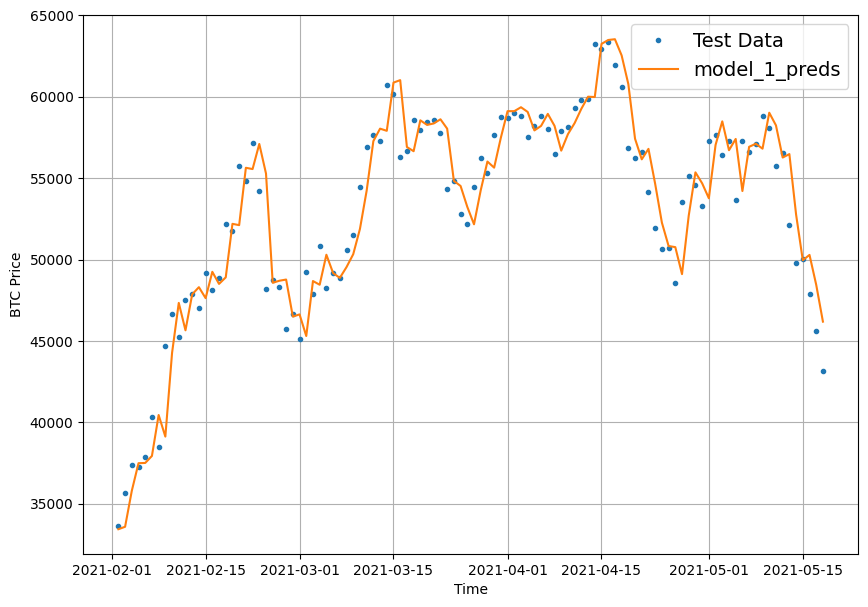

In [46]:
offset = 450
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=x_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset, label="Test Data")
plot_time_series(timesteps=x_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")

In [47]:
HORIZON = 1
WINDOW_SIZE = 30

full_windows, full_labels=make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [48]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [49]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [50]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 691.1644


691.1644287109375

In [51]:
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 621.2483


621.248291015625

In [52]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 1ms/step


In [53]:
test_labels.shape, model_2_preds.shape

((552, 1), TensorShape([552]))

In [54]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 621.2483,
 'mse': 1342293.2,
 'rmse': 1158.5737,
 'mape': 2.7735298,
 'mase': 1.0859481}

In [55]:
model_1_results

{'mae': 571.03046,
 'mse': 1172195.1,
 'rmse': 1082.6796,
 'mape': 2.5577369,
 'mase': 1.0031424}

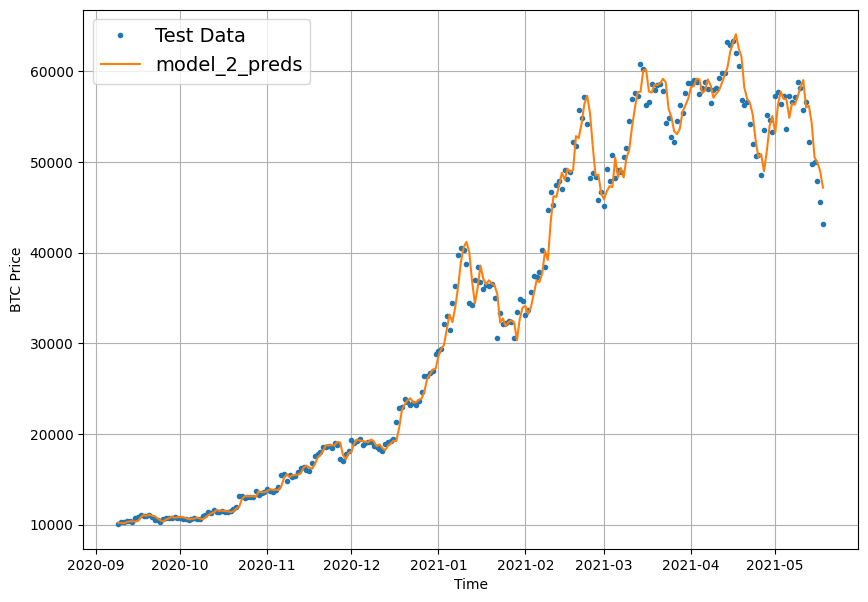

In [56]:
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

In [57]:
prices[:10]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116])

In [58]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [59]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [60]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [61]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1239.7354


1239.7353515625

In [62]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9402.152 , 9516.298 , 9532.746 , 9495.209 , 9475.982 , 9506.945 ,
        9424.803 ],
       [9187.714 , 9119.517 , 9269.621 , 9133.789 , 9243.325 , 9218.573 ,
        9090.177 ],
       [8905.675 , 8922.888 , 8912.773 , 8972.718 , 8961.697 , 9034.585 ,
        8978.5   ],
       [9008.948 , 9110.073 , 8912.986 , 9168.73  , 9114.32  , 9151.713 ,
        9111.459 ],
       [8898.194 , 9082.259 , 8886.3545, 9129.819 , 8861.742 , 9068.889 ,
        8926.755 ]], dtype=float32)>

In [63]:
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8737.294, 8902.974, 8818.645, 8485.887, 8462.561], dtype=float32)>

In [64]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  685.94727 ,   429.13226 ,   301.40723 ,   456.00977 ,
          424.79688 ,   539.44354 ,   585.47614 ,   563.76276 ,
          500.014   ,   579.7126  ,   809.82263 ,   753.3223  ,
          787.4126  ,   967.832   ,   707.6938  ,   283.36774 ,
          269.0097  ,   273.95947 ,   242.73131 ,   239.69922 ,
          155.35973 ,   199.08621 ,   421.10324 ,   377.88254 ,
          295.50836 ,   157.9008  ,   110.74721 ,    50.282646,
          121.65569 ,   244.71394 ,   298.5687  ,   377.89194 ,
          373.1561  ,   325.58984 ,   271.6716  ,   293.0171  ,
          333.21805 ,   239.63065 ,   267.83252 ,   216.76912 ,
          450.47787 ,   105.942245,   105.594795,    65.19908 ,
          139.51744 ,   200.04276 ,   100.354774,   134.5886  ,
          124.940636,   126.906044,   105.91671 ,   198.1559  ,
          244.42271 ,   195.28795 ,   281.63226 ,   352.27637 ,
          562.47565 ,   452.9056  ,   533.89404 ,   529.765   ,
          314.5854  ,   269.21924

In [65]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [66]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1239.7355,
 'mse': 5352953.5,
 'rmse': 1430.9027,
 'mape': 5.64201,
 'mase': 2.2060401}

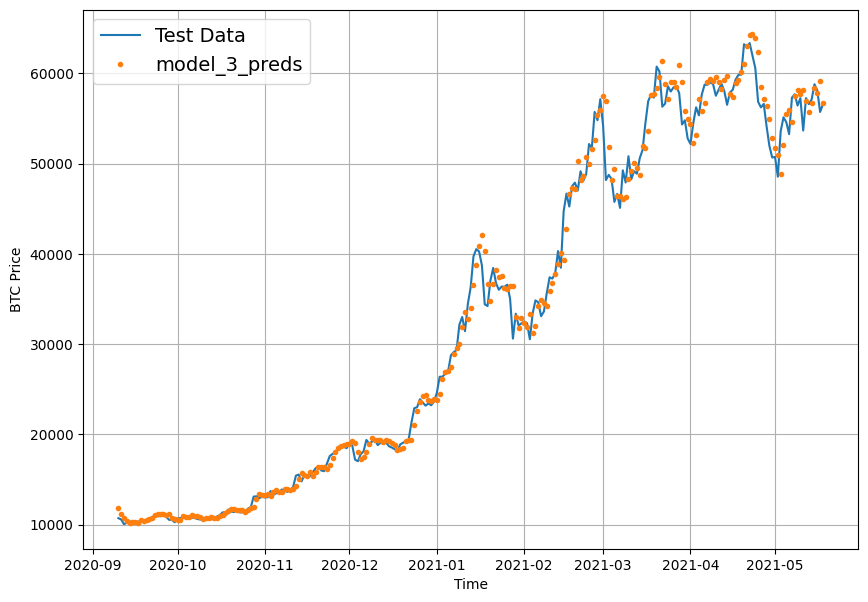

In [67]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 format="-",
                 label="Test Data")

plot_time_series(timesteps=x_test[-len(test_windows):],
                 values=model_3_preds[:, 0],
                 start=offset,
                 label="model_3_preds")

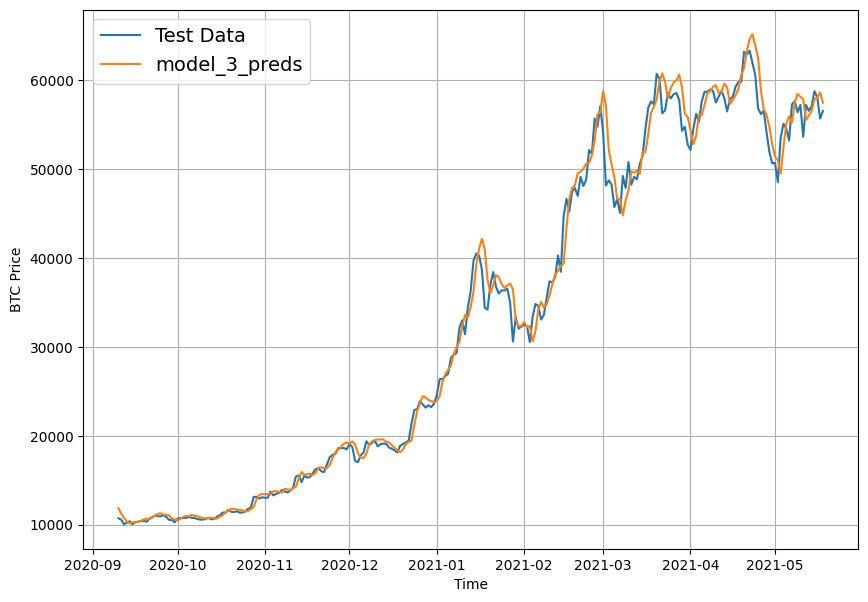

In [68]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 format="-",
                 label="Test Data")

plot_time_series(timesteps=x_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 format="-",
                 label="model_3_preds")

<Axes: >

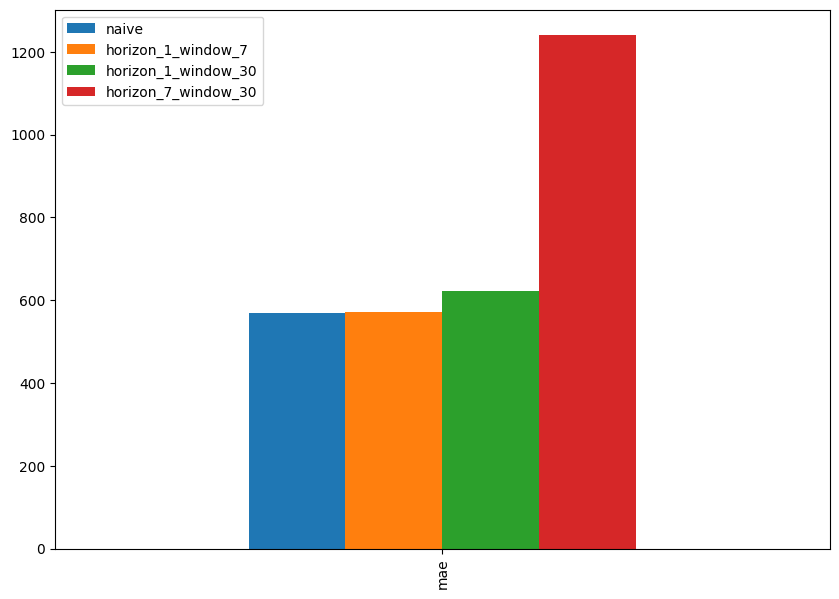

In [69]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7 ), kind="bar")

In [70]:
HORIZON = 1
WINDOW_SIZE = 7

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [71]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows), len(train_labels), len(test_labels), len(test_windows)

(2224, 2224, 556, 556)

In [72]:
train_windows[0].shape

(7,)

In [73]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [74]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [75]:
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [76]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=5, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [77]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 627.5458


627.5457763671875

In [80]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 568.0828


568.0828247070312

In [81]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8858.453 , 8755.248 , 9000.346 , 8771.513 , 8719.553 , 8733.082 ,
       8667.1875, 8506.7   , 8447.61  , 8507.019 ], dtype=float32)>

In [82]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_4_preds)

model_4_results

{'mae': 568.0828,
 'mse': 1169798.0,
 'rmse': 1081.572,
 'mape': 2.5407455,
 'mase': 0.9979642}

In [83]:
model_1_results

{'mae': 571.03046,
 'mse': 1172195.1,
 'rmse': 1082.6796,
 'mape': 2.5577369,
 'mase': 1.0031424}

In [84]:
tf.random.set_seed(42)

inputs = layers.Input(shape=WINDOW_SIZE)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequence=True)(x)
x = layers.LSTM(128, activation="relu")(x)
#x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 4s 99ms/step - loss: 2227.6470 - val_loss: 7881.3813
Epoch 2/100
18/18 [==============================] - 1s 86ms/step - loss: 477.2339 - val_loss: 1900.6101
Epoch 3/100
18/18 [==============================] - 2s 108ms/step - loss: 241.7912 - val_loss: 1351.8693
Epoch 4/100
18/18 [==============================] - 1s 85ms/step - loss: 201.5098 - val_loss: 1162.2152
Epoch 5/100
18/18 [==============================] - 1s 82ms/step - loss: 197.1875 - val_loss: 1110.4420
Epoch 6/100
18/18 [==============================] - 2s 102ms/step - loss: 193.6434 - val_loss: 1078.6509
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 195.2589 - val_loss: 1079.2417
Epoch 8/100
18/18 [==============================] - 0s 10ms/step - loss: 190.9237 - val_loss: 1084.1854
Epoch 9/100
18/18 [==============================] - 2s 95ms/step - loss: 188.7655 - val_loss: 1066.6038
Epoch 10/100
18/18 [==============================] -

In [85]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 594.5959


594.595947265625

In [86]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8955.555, 8805.117, 8936.425, 8818.16 , 8769.328], dtype=float32)>

In [87]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 594.5959,
 'mse': 1259186.5,
 'rmse': 1122.1348,
 'mape': 2.6792264,
 'mase': 1.0445403}

In [88]:
model_1_results

{'mae': 571.03046,
 'mse': 1172195.1,
 'rmse': 1082.6796,
 'mape': 2.5577369,
 'mase': 1.0031424}

In [89]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [90]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [91]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [92]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [93]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

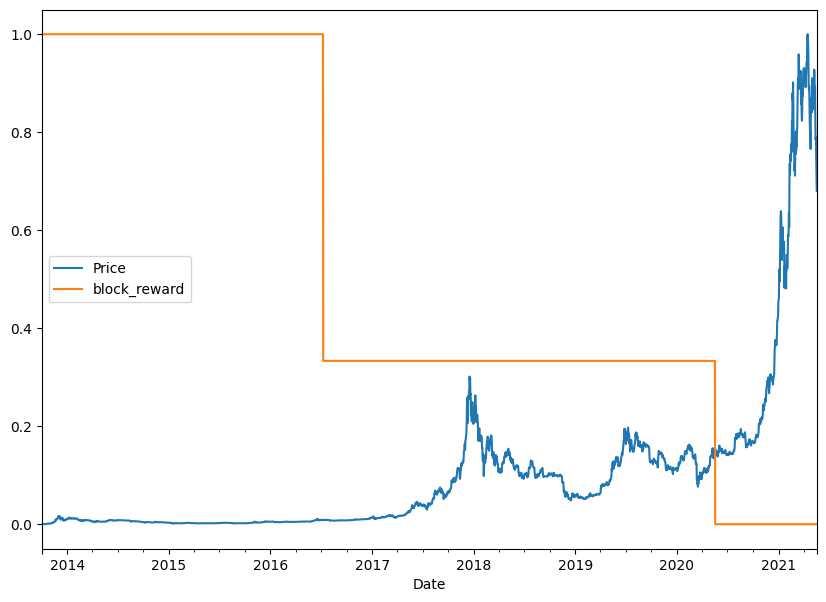

In [94]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7))

In [95]:
HORIZON = 1
WINDOW_SIZE = 7

In [96]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [97]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [98]:
x = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
x.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [99]:
split_size = int(len(x) * 0.8)
x_train, y_train = x[:split_size], y[:split_size]
x_test, y_test = x[split_size:], y[split_size:]
len(x_train), len(y_train), len(x_test), len(y_test)

(2224, 2224, 556, 556)

In [100]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    #layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(x_train,
            y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(x_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 31ms/step - loss: 2234.5879 - val_loss: 1080.7578
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 404.1901 - val_loss: 2071.7932
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 249.5493 - val_loss: 1150.2072
Epoch 4/100
18/18 [==============================] - 0s 23ms/step - loss: 195.0030 - val_loss: 1024.2257
Epoch 5/100
18/18 [==============================] - 0s 22ms/step - loss: 181.8395 - val_loss: 976.4413
Epoch 6/100
18/18 [==============================] - 0s 24ms/step - loss: 173.0119 - val_loss: 944.5517
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 166.1096 - val_loss: 972.0970
Epoch 8/100
18/18 [==============================] - 0s 23ms/step - loss: 161.7968 - val_loss: 878.6895
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 157.7925 - val_loss: 896.1997
Epoch 10/100
18/18 [==============================] - 0s 23ms/s

In [101]:
model_6.evaluate(x_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 762.6414


762.6414184570312

In [102]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(x_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 564.2193


564.2192993164062

In [103]:
model_6_preds = tf.squeeze(model_6.predict(x_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8838.309 , 8769.557 , 9049.66  , 8783.467 , 8720.434 , 8739.663 ,
       8678.044 , 8520.8545, 8449.748 , 8532.9375], dtype=float32)>

In [104]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 564.2193,
 'mse': 1156753.5,
 'rmse': 1075.5248,
 'mape': 2.5223641,
 'mase': 0.991177}

In [105]:
model_1_results

{'mae': 571.03046,
 'mse': 1172195.1,
 'rmse': 1082.6796,
 'mape': 2.5577369,
 'mase': 1.0031424}

In [106]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [107]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [108]:
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [109]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [110]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19062841  0.46749043 -0.8874823  -0.20957136 -1.1062708   0.3977287
  0.2892021 ]
Forecast: 0.2935086488723755


In [111]:
HORIZON = 1
WINDOW_SIZE = 7

In [112]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [113]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [114]:
x = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

split_size = int(len(x) * 0.8)
x_train, y_train = x[:split_size], y[:split_size]
x_test, y_test = x[split_size:], y[split_size:]
len(x_train), len(y_train), len(x_test), len(y_test)

(2224, 2224, 556, 556)

In [115]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [116]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [117]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1, tensor_2])

added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Substracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Substracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [118]:
%%time

tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

residuals, forecast = nbeats_block_layer(stack_input)

for i, _ in enumerate(range(N_STACKS-1)):
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)

  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 861: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1097: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1197: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 5min 10s, sys: 8.09 s, total: 5min 18s
Wall time: 6min 36s


In [119]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 22ms/step - loss: 574.2050


574.2050170898438

In [120]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 2s 2s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8845.873 , 8773.901 , 9018.4375, 8739.915 , 8738.841 , 8753.92  ,
       8650.825 , 8495.524 , 8472.522 , 8506.982 ], dtype=float32)>

In [121]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 574.205,
 'mse': 1168099.1,
 'rmse': 1080.7864,
 'mape': 2.5997868,
 'mase': 1.0087192}

In [122]:
model_1_results

{'mae': 571.03046,
 'mse': 1172195.1,
 'rmse': 1082.6796,
 'mape': 2.5577369,
 'mase': 1.0031424}

In [123]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

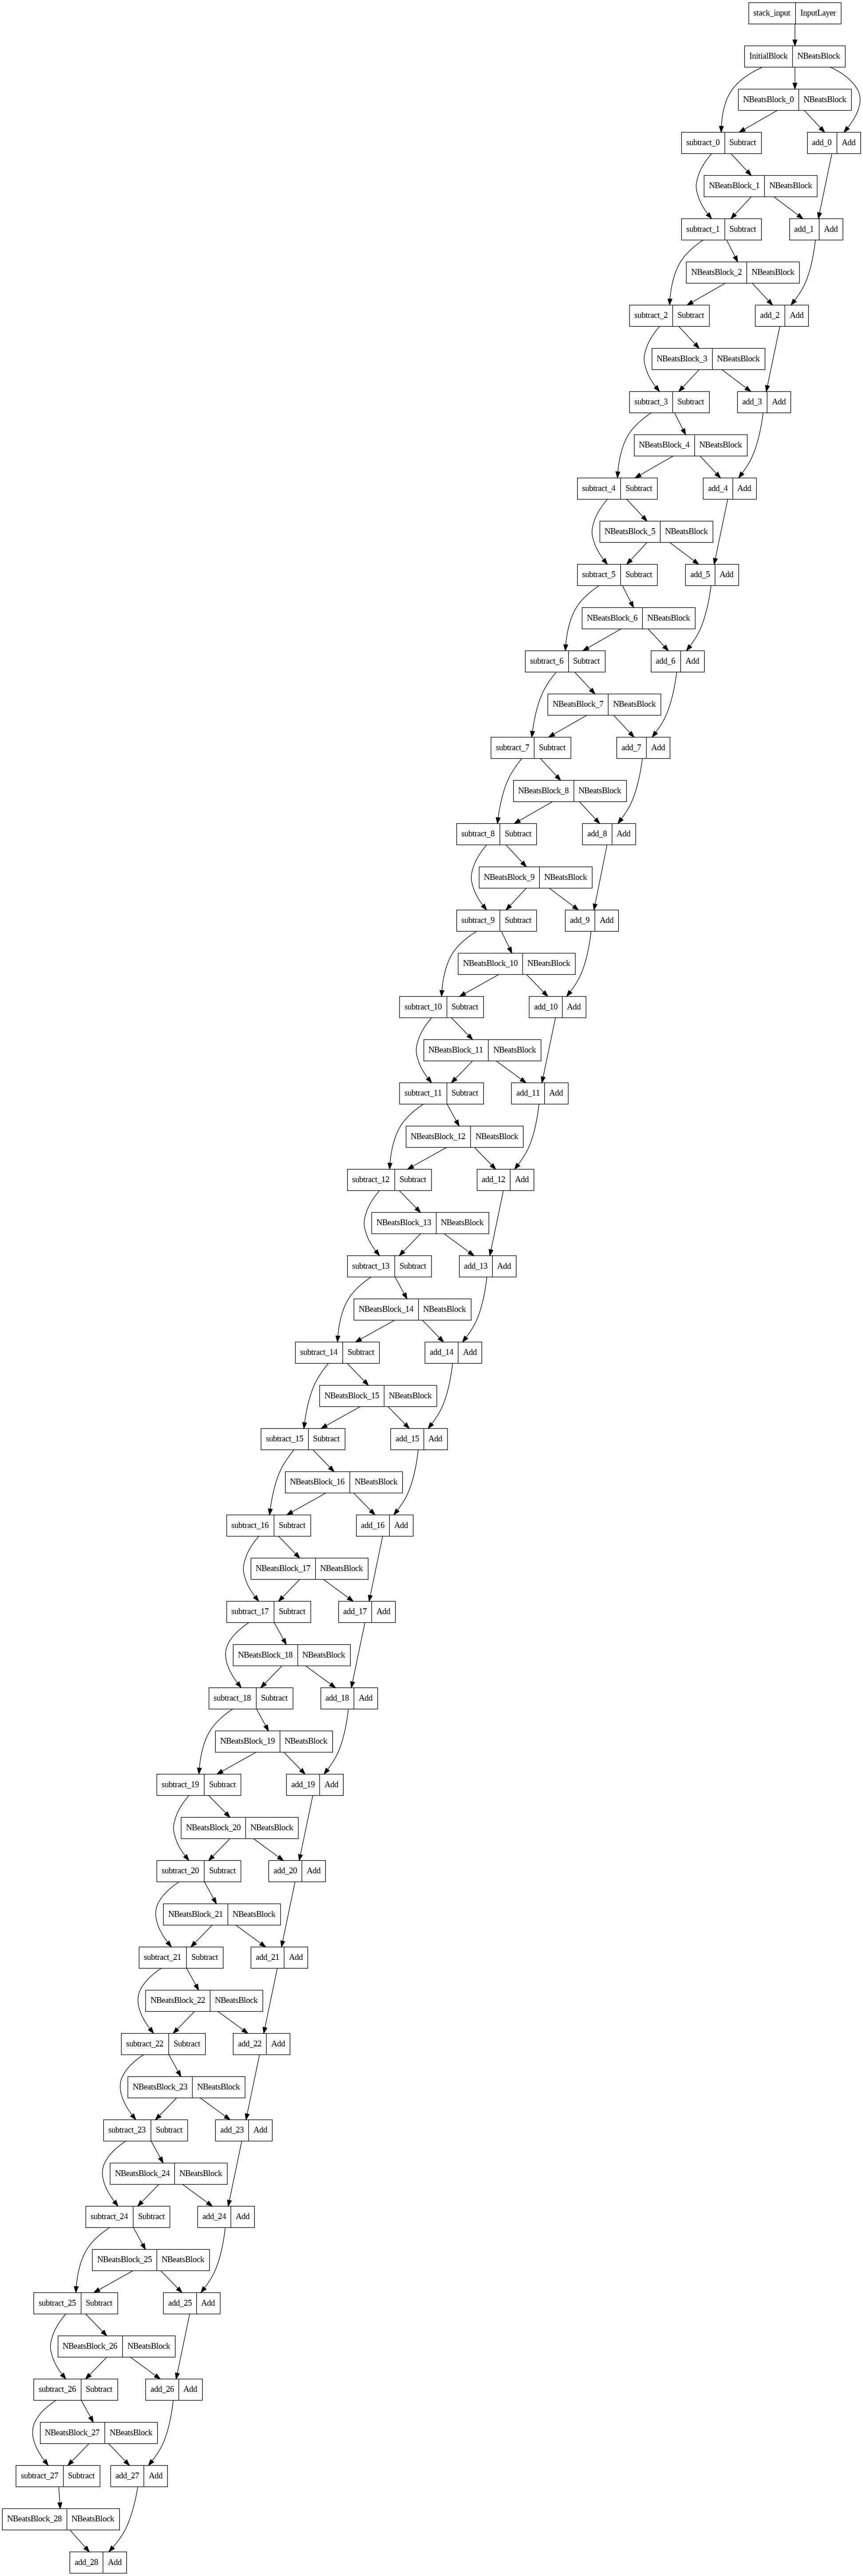

In [124]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [134]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae","mse","mape"]):

  ensemble_models = []

  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])

      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                               patience=100,
                                                               verbose=1)])

      ensemble_models.append(model)

  return ensemble_models

In [135]:
%%time

ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 423: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 978: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 123: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 465: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 565: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 688: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 424: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 524: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by redu

In [136]:
len(ensemble_models)

15

In [137]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [139]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 68ms/step
CPU times: user 1.04 s, sys: 28.3 ms, total: 1.07 s
Wall time: 1.29 s


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8774.695 ,  8846.588 ,  9147.081 , ..., 50174.39  , 49878.59  ,
        44842.453 ],
       [ 8783.093 ,  8755.476 ,  9009.735 , ..., 49900.04  , 48517.258 ,
        45905.07  ],
       [ 8788.7295,  8756.325 ,  9052.241 , ..., 49795.016 , 48779.105 ,
        46984.008 ],
       ...,
       [ 8824.438 ,  8788.33  ,  9095.73  , ..., 50467.266 , 48614.316 ,
        45496.145 ],
       [ 8776.041 ,  8754.067 ,  9104.754 , ..., 50182.992 , 48880.863 ,
        45312.17  ],
       [ 8783.58  ,  8754.59  ,  9133.359 , ..., 49889.152 , 48059.434 ,
        46234.41  ]], dtype=float32)>

In [140]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_preds)
ensemble_results

{'mae': 578.82135,
 'mse': 1181340.8,
 'rmse': 1086.7875,
 'mape': 2.619114,
 'mase': 1.0168288}

In [141]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8784.438 ,  8772.235 ,  9078.033 ,  8714.645 ,  8738.097 ,
        8744.944 ,  8657.948 ,  8477.203 ,  8466.368 ,  8525.726 ,
        8198.156 ,  8100.0435,  8072.626 ,  7626.096 ,  7286.405 ,
        7318.169 ,  7088.925 ,  7204.79  ,  7139.7646,  7518.0547,
        7391.114 ,  7733.991 ,  7571.5234,  7388.6216,  7326.175 ,
        7319.4263,  7202.968 ,  7387.456 ,  7511.603 ,  7533.5444,
        7544.6606,  7335.2363,  7225.7314,  7186.68  ,  7186.0874,
        7229.413 ,  7085.723 ,  7096.3184,  6875.4136,  6580.066 ,
        7382.3345,  7169.1104,  7136.503 ,  7275.047 ,  7276.3394,
        7197.532 ,  7223.68  ,  7208.4062,  7172.408 ,  7212.212 ,
        7304.4795,  7382.507 ,  7243.6714,  7161.8325,  7161.7095,
        6949.6377,  7271.851 ,  7341.6826,  7348.5557,  7716.4897,
        8075.858 ,  8139.581 ,  7847.4194,  8094.458 ,  8125.994 ,
        8161.252 ,  8102.5303,  8747.488 ,  8903.796 ,  8752.468 ,
        8940.3

In [142]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median

array([ 8783.093 ,  8758.82  ,  9069.005 ,  8722.909 ,  8727.078 ,
        8737.506 ,  8650.101 ,  8484.397 ,  8462.839 ,  8529.596 ,
        8199.217 ,  8096.222 ,  8068.0703,  7636.936 ,  7276.6113,
        7315.25  ,  7082.905 ,  7209.279 ,  7135.7754,  7510.5815,
        7399.85  ,  7739.188 ,  7576.689 ,  7391.8877,  7315.7   ,
        7322.8823,  7199.735 ,  7386.494 ,  7512.533 ,  7536.695 ,
        7543.6787,  7333.6357,  7228.37  ,  7182.8706,  7180.061 ,
        7230.5596,  7080.563 ,  7094.6177,  6879.5503,  6582.835 ,
        7375.6294,  7162.2266,  7134.6484,  7275.6274,  7277.473 ,
        7190.4526,  7220.9365,  7211.126 ,  7175.816 ,  7209.6147,
        7304.599 ,  7384.874 ,  7244.9087,  7162.1157,  7158.1675,
        6947.2305,  7271.7583,  7342.1235,  7348.0034,  7714.031 ,
        8079.3687,  8133.542 ,  7838.3706,  8101.432 ,  8135.0054,
        8165.1313,  8100.84  ,  8747.211 ,  8897.192 ,  8747.232 ,
        8944.888 ,  8986.214 ,  8677.082 ,  8623.96  ,  8703.6

In [143]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 569.0897,
 'mse': 1148888.4,
 'rmse': 1071.862,
 'mape': 2.5755484,
 'mase': 0.99973303}

In [144]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 570.2437,
 'mse': 1151341.5,
 'rmse': 1073.0059,
 'mape': 2.5698607,
 'mase': 1.0017602}

In [145]:
model_1_results

{'mae': 571.03046,
 'mse': 1172195.1,
 'rmse': 1082.6796,
 'mape': 2.5577369,
 'mase': 1.0031424}

In [146]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [147]:
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis=0)

  interval = 1.96 * std

  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [148]:
lower, upper = get_upper_lower(preds=ensemble_preds)
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8730.746 ,  8705.312 ,  9006.406 ,  8654.759 ,  8662.094 ,
         8674.352 ,  8600.808 ,  8421.93  ,  8410.893 ,  8489.063 ,
         8152.9673,  8048.1387,  8012.107 ,  7564.547 ,  7215.348 ,
         7235.092 ,  7005.493 ,  7143.6953,  7063.326 ,  7455.368 ,
         7313.01  ,  7649.478 ,  7504.1094,  7330.73  ,  7270.1978,
         7272.383 ,  7155.4033,  7356.4653,  7479.073 ,  7501.697 ,
         7508.7773,  7304.387 ,  7184.1157,  7143.52  ,  7152.749 ,
         7190.373 ,  7043.9067,  7067.202 ,  6841.666 ,  6526.9683,
         7280.9946,  7046.5684,  7014.3516,  7138.386 ,  7214.059 ,
         7092.554 ,  7192.2764,  7182.949 ,  7136.633 ,  7185.5913,
         7277.286 ,  7354.5557,  7217.944 ,  7130.7715,  7129.372 ,
         6913.8726,  7226.1885,  7293.0254,  7296.759 ,  7647.2524,
         8019.944 ,  8074.642 ,  7793.5273,  8017.75  ,  8078.9736,
         8084.5327,  8046.7983,  8661.561 ,  8858.757 ,  8681.465 ,

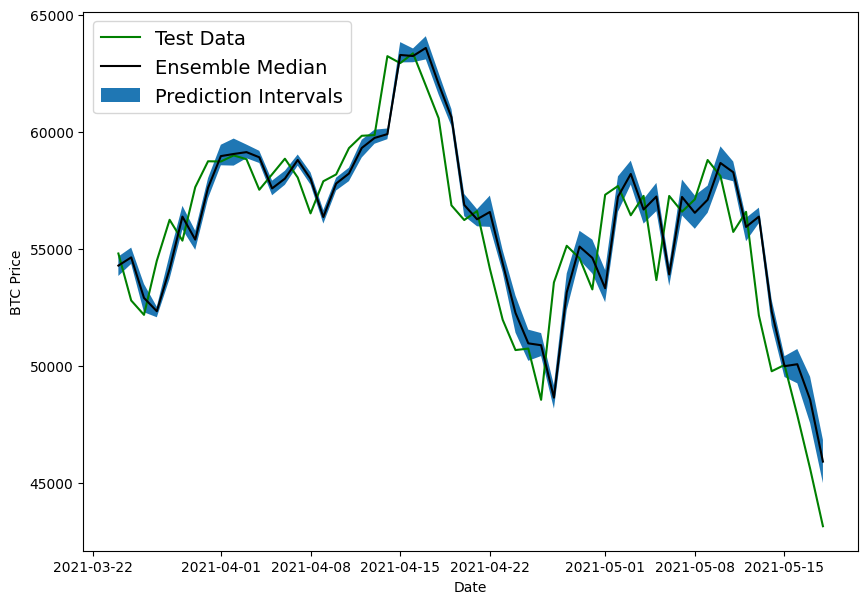

In [152]:
ensemble_median = np.median(ensemble_preds, axis=0)

offset=500
plt.figure(figsize=(10, 7))
plt.plot(x_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(x_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(x_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14)

In [153]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [155]:
x_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()

y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(x_all), len(y_all)

(2780, 2780)

In [156]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(x_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [158]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_9_future_model")

model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

In [159]:
INTO_FUTURE = 14

In [164]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(INTO_FUTURE):
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  return future_forecast

In [165]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 18ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55908.89453125

1/1 [==============================] - 0s 17ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55908.89453125] -> Prediction: 51768.41796875

1/1 [==============================] - 0s 17ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55908.89453125 51768.41796875] -> Prediction: 48258.2109375

1/1 [==============================] - 0s 17ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55908.89453125 51768.41796875 48258.2109375 ] -> Prediction: 49676.81640625

1/1 [==============================] - 0s 20ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55908.89453125
 51768.41796875 48258.2109375  49676.8164062

In [166]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [167]:
future_forecast

[55908.895,
 51768.418,
 48258.21,
 49676.816,
 46955.242,
 47129.152,
 48268.227,
 54521.52,
 50680.574,
 47748.26,
 49286.555,
 47636.156,
 48872.297,
 50555.74]

In [168]:
def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future, "D")

  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [169]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [170]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [172]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55908.895, 51768.418, 48258.21 , 49676.816, 46955.242,
        47129.152, 48268.227, 54521.52 , 50680.574, 47748.26 , 49286.555,
        47636.156, 48872.297, 50555.74 ], dtype=float32))

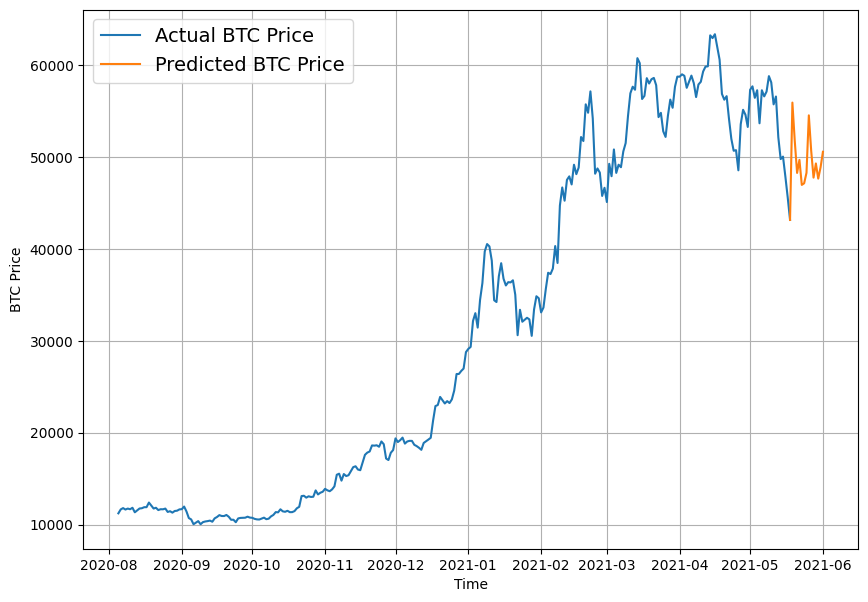

In [173]:
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

In [174]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [175]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [176]:
btc_price[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 43144.4712908603]

In [177]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

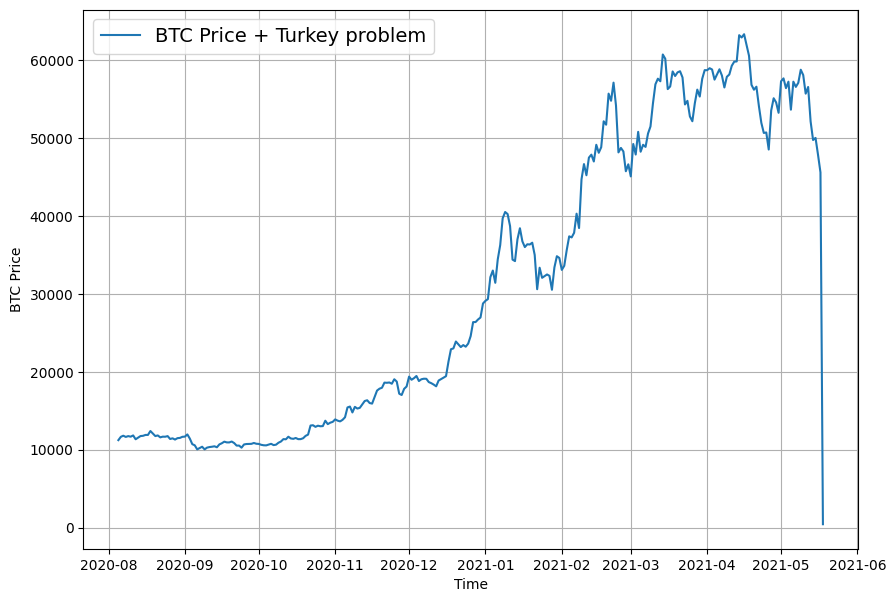

In [178]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500
                 )

In [179]:
HORIZON = 1
WINDOW_SIZE = 7

In [180]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

x_train, x_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(x_train), len(x_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [181]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [182]:
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())

turkey_model.fit(x_train,
                 y_train,
                 verbose=0,
                 batch_size=128,
                 validation_data=(x_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [183]:
turkey_model.evaluate(x_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 1312.4749


1312.474853515625

In [184]:
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(x_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 1312.4749


1312.474853515625

In [185]:
turkey_preds = make_preds(turkey_model, x_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9699.267, 9501.637, 9628.385, 9613.275, 9445.526, 9433.174,
       9290.536, 9183.722, 9206.125, 9095.366], dtype=float32)>

In [186]:
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17547.76,
 'mse': 646049300.0,
 'rmse': 24533.604,
 'mape': 127.076035,
 'mase': 27.155218}

In [187]:
model_1_results

{'mae': 571.03046,
 'mse': 1172195.1,
 'rmse': 1082.6796,
 'mape': 2.5577369,
 'mase': 1.0031424}

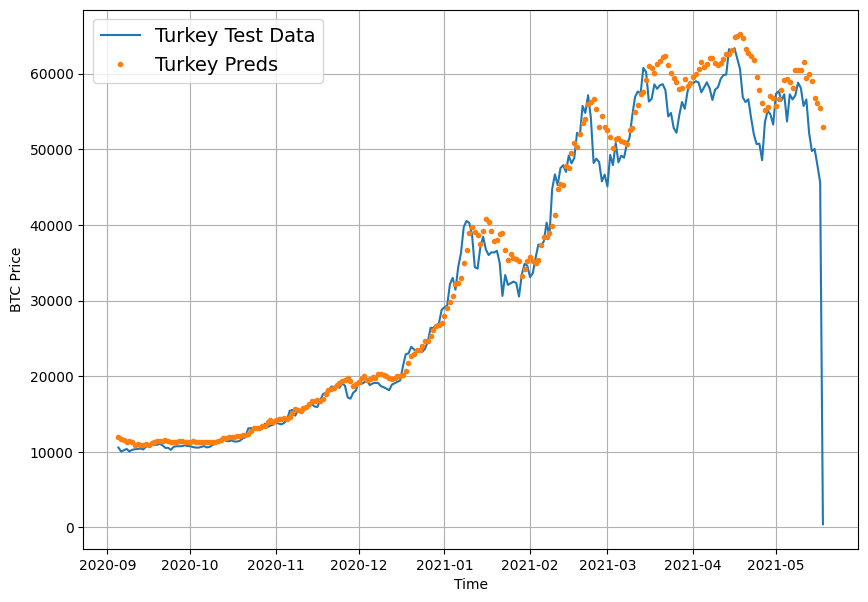

In [188]:
plt.figure(figsize=(10, 7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(x_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(x_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset)

In [189]:
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T

model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,571.030457,1.172195e+06,1082.679565,2.557737,1.003142
model_2_dense_w30_h1,621.248291,1.342293e+06,1158.573730,2.773530,1.085948
model_3_dense_w30_h7,1239.735474,5.352954e+06,1430.902710,5.642010,2.206040
model_4_CONV1D,568.082825,1.169798e+06,1081.572021,2.540745,0.997964
model_5_LSTM,594.595886,1.259186e+06,1122.134766,2.679226,1.044540
model_6_multivariate,564.219299,1.156754e+06,1075.524780,2.522364,0.991177
model_7_NBEATS,574.205017,1.168099e+06,1080.786377,2.599787,1.008719
model_8_ensemble,570.243713,1.151342e+06,1073.005859,2.569861,1.001760
model_10_turkey,17547.759766,6.460493e+08,24533.603516,127.076035,27.155218


<Axes: >

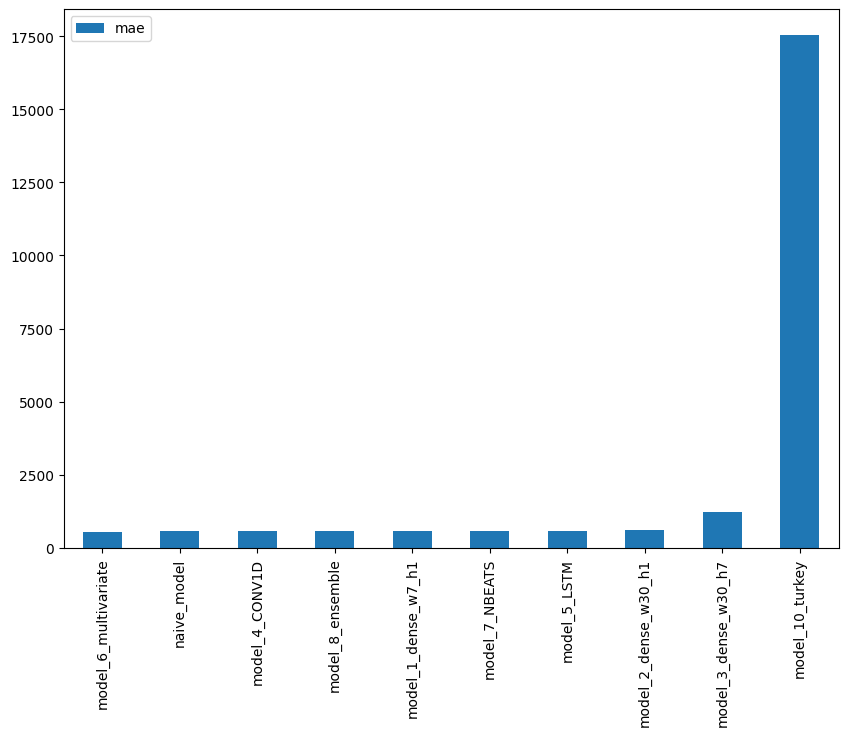

In [190]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")